# Todo

- setting Freeze as False might also be making a difference
- setting Train shuffle to True in ImageDataGenerator made all the difference
    - Seems like it either because of the data or the preprocess step (augmentation), because the results have improved quite a lot with the inceptionv3 notebook data
    - it can be also because of the way that guy handled the lr, if nothing above works out
- InceptionV3

# Setup

In [ ]:
import os
os.environ['WANDB_MODE'] = 'online' # offline

if 'WANDB_API_KEY' not in os.environ:
  from getpass import getpass
  secret = getpass('Enter WandB API Key: ')
  os.environ['WANDB_API_KEY'] = secret

Enter WandB API Key: ··········


In [ ]:
%%bash
#!/bin/bash

# setting up kaggle
wget https://www.dropbox.com/s/ltp4ly8ilvxlgas/kaggle.json
mkdir -p ~/.kaggle
mv kaggle.json ~/.kaggle
chmod 600 /root/.kaggle/kaggle.json

pip install scikit-learn opencv-python kaggle pandas numpy tensorflow tensorflow-addons wandb split-folders

# setting up data dir
rm -rf data/1_extracted data/2_processed data/3_consume data/4_tfds_dataset data/corrupted_images
mkdir -p data/0_raw data/1_extracted data/2_processed data/3_consume data/4_tfds_dataset data/corrupted_images checkpoints

# # dataset 1 processing
# kaggle datasets download salmaneunus/rock-classification --path data/0_raw/
# unzip -q data/0_raw/rock-classification.zip -d data/1_extracted/
# mv data/1_extracted/Dataset/Igneous/* data/2_processed
# mv data/1_extracted/Dataset/Metamorphic/* data/2_processed
# mv data/1_extracted/Dataset/Sedimentary/* data/2_processed

# # dataset 2 processing
# kaggle datasets download mahmoudalforawi/igneous-metamorphic-sedimentary-rocks-and-minerals --path data/0_raw/
# unzip -q data/0_raw/igneous-metamorphic-sedimentary-rocks-and-minerals.zip -d data/1_extracted/
# # https://serverfault.com/a/267266/979238
# mv --backup=t data/1_extracted/Rock_Dataset/igneous\ rocks/Basalt/* data/2_processed/Basalt/
# mv --backup=t data/1_extracted/Rock_Dataset/igneous\ rocks/granite/* data/2_processed/Granite/
# mv --backup=t data/1_extracted/Rock_Dataset/metamorphic\ rocks/marble/* data/2_processed/Marble/
# mv --backup=t data/1_extracted/Rock_Dataset/metamorphic\ rocks/quartzite/* data/2_processed/Quartzite/
# mv --backup=t data/1_extracted/Rock_Dataset/sedimentary\ rocks/coal/* data/2_processed/Coal/
# mv --backup=t data/1_extracted/Rock_Dataset/sedimentary\ rocks/Limestone/* data/2_processed/Limestone/
# mv --backup=t data/1_extracted/Rock_Dataset/sedimentary\ rocks/Sandstone/* data/2_processed/Sandstone/
# rm -rf data/1_extracted/Rock_Dataset/minerals

# dataset 3 processing
wget --quiet -O data/0_raw/dataset3.zip https://github.com/SmartPracticeschool/llSPS-INT-3797-Rock-identification-using-deep-convolution-neural-network/raw/master/dataset.zip
unzip -q data/0_raw/dataset3.zip -d data/1_extracted/
mv --backup=t data/1_extracted/dataset/*/Basalt/* data/2_processed/Basalt/
mv --backup=t data/1_extracted/dataset/*/Granite/* data/2_processed/Granite/
mv --backup=t data/1_extracted/dataset/*/Marble/* data/2_processed/Marble/
mv --backup=t data/1_extracted/dataset/*/Quartzite/* data/2_processed/Quartzite/
mv --backup=t data/1_extracted/dataset/*/Limestone/* data/2_processed/Limestone/
mv --backup=t data/1_extracted/dataset/*/Sandstone/* data/2_processed/Sandstone/

# # dataset 4 processing
# kaggle datasets download neelgajare/rocks-dataset --path data/0_raw/
# unzip -q data/0_raw/rocks-dataset.zip -d data/1_extracted/
# cp -r --backup=t data/1_extracted/Rocks/Basalt/* data/2_processed/Basalt/
# cp -r --backup=t data/1_extracted/Rocks/Granite/* data/2_processed/Granite/
# cp -r --backup=t data/1_extracted/Rocks/Marble/* data/2_processed/Marble/
# cp -r --backup=t data/1_extracted/Rocks/Quartzite/* data/2_processed/Quartzite/
# cp -r --backup=t data/1_extracted/Rocks/Coal/* data/2_processed/Coal/
# cp -r --backup=t data/1_extracted/Rocks/Limestone/* data/2_processed/Limestone/
# cp -r --backup=t data/1_extracted/Rocks/Sandstone/* data/2_processed/Sandstone/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=e38a174de241b98f8ef7aadcc3981466ae3aeb88c2ecb940ea59cf9af5f4b997
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools



--2022-08-30 13:36:29--  https://www.dropbox.com/s/ltp4ly8ilvxlgas/kaggle.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ltp4ly8ilvxlgas/kaggle.json [following]
--2022-08-30 13:36:29--  https://www.dropbox.com/s/raw/ltp4ly8ilvxlgas/kaggle.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6955c459ecb44e5713a5880914.dl.dropboxusercontent.com/cd/0/inline/Br_AoBfPme6NVbxRSYbd2kJ0q4MsRQnLzx5sHEFRJLSLyvw0Wa1FRAWcgZSZzw6kratL0Cx81X-jj5X_dBmZIcSRSk2QdTVTDaB0g0jYSXI93eGXP6ShSP1hV7VTAr9vYZb_06CV8NKtCfIPGT7_mvH8ym9LQqlWrOhMm6tB79navg/file# [following]
--2022-08-30 13:36:30--  https://uc6955c459ecb44e5713a5880914.dl.dropboxusercontent.com/cd/0/inline/Br_AoBfPme6NVbxRSYbd2kJ0q4MsRQnLzx5sHEFRJLSLyvw0Wa1FRAWcgZSZzw6kratL0Cx81X-jj5X_

In [ ]:
import json
default = dict(
    notes='''
    
    Datasets used:[1], sampling: None, class-weights:True, 
    preprocessing:rescale=1./255,
    
    ''',
    model_name="efficientnet",
    dataset=[3],
    augment=True,
    freeze=False,
    finetune=True,
    pretrained_model_link="rock-classifiers/Whats-this-rockv2/cvzc7hq0",
    sampling=None, # oversample, undersample, None
    optimizer="adam",
    lr=.0007,
    batch_size=32,
    max_epochs=50,
    image_size=224,
    loss_fn='categorical_crossentropy',
    metrics=['accuracy'],
    earlystopping_patience=10,
    earlystopping_min_delta = 0.02,
    lr_reduce_patience=3,
    lr_reduce_factor=.3,
    threshold=.7,
)

# save dictionary to config.json file
with open('config.json', 'w') as f:
    json.dump(default, f)

config = default

In [ ]:
import os
import shutil
import argparse
# https://stackoverflow.com/a/64006242/9292995
import splitfolders


def get_df(root="data/2_processed"):
    """
    root: a folder present inside data dir, which contains classes containing images
    """
    classes = os.listdir(root)

    class_names = []
    images_paths = []
    file_names = []

    for class_name in classes:
        for dirname, _, filenames in os.walk(os.path.join(root, class_name)):
            for file_name in filenames:
                images_paths.append(os.path.join(root, class_name, file_name))
                class_names.append(class_name)
                file_names.append(file_name)

    import pandas as pd
    df = pd.DataFrame(list(zip(file_names, class_names, images_paths)), columns=['file_name', 'class', 'file_path'])

    return df



root = 'data/1_extracted/'
print(get_df().info())
print(get_df()['class'].value_counts())
print("Splitting files in Train, Validation and Test and saving to data/4_tfds_dataset/")
if cfg.dataset.sampling == 'oversample':
    # If your datasets is balanced (each class has the same number of samples), choose ratio otherwise fixed.
    print("Finding smallest class for oversampling fixed parameter.")
    scc = min(get_df()['class'].value_counts())
    print(f"Smallest class count is {scc}\n")
    splitfolders.fixed('data/2_processed', output="data/4_tfds_dataset", oversample=True, fixed=((scc//2, scc//2)),
                    seed=42)
elif cfg.dataset.sampling == 'undersample':
    splitfolders.fixed('data/2_processed', output="data/4_tfds_dataset",
                    fixed=(int(config['undersample']  * 0.75), int(config['undersample'] * 0.125), int(config['undersample']  * 0.125)),
                    oversample=False,
                    seed=42)
else:
    splitfolders.ratio('data/2_processed', output="data/4_tfds_dataset",
                    ratio=(0.75, 0.125, 0.125),
                    seed=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  2083 non-null   object
 1   class      2083 non-null   object
 2   file_path  2083 non-null   object
dtypes: object(3)
memory usage: 48.9+ KB
None
Quartzite    477
Marble       387
Coal         369
Limestone    338
Sandstone    325
Granite      101
Basalt        86
Name: class, dtype: int64
Splitting files in Train, Validation and Test and saving to data/4_tfds_dataset/


Copying files: 2083 files [00:00, 4903.97 files/s]


# Train

In [ ]:
#@title Boilerplate Code { display-mode: "form" }

import pandas as pd
import numpy as np
import os
import shutil
import json
from tensorflow import image, cast, one_hot, float32
import tensorflow_datasets as tfds
from tensorflow.data import AUTOTUNE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input


def get_generators(config):
    if config['augment']:
        print("Augmentation is True! rescale=1./255")
        train_datagen = ImageDataGenerator(
            horizontal_flip=True,
            vertical_flip=True,
            rotation_range=20,
            rescale=1./255)  # preprocessing_function=scalar
    elif not config['augment']:
        print("No Augmentation!")
        train_datagen = ImageDataGenerator(rescale=1./255)
    else:
        print("Error in config.augment. Stop Training!")

    train_dataset = train_datagen.flow_from_directory(
        'data/4_tfds_dataset/train',
        target_size=(config['image_size'], config['image_size']),
        batch_size=config['batch_size'],
        shuffle=True,
        color_mode='rgb',
        class_mode='categorical')

    test_datagen = ImageDataGenerator(rescale=1./255) # preprocessing_function=scalar
    val_dataset = test_datagen.flow_from_directory(
        'data/4_tfds_dataset/val',
        shuffle=False,
        color_mode='rgb',
        target_size=(config['image_size'], config['image_size']),
        batch_size=config['image_size'],
        class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(
        'data/4_tfds_dataset/test',
        batch_size=config['batch_size'],
        seed=42,
        color_mode='rgb',
        shuffle=False,
        class_mode="categorical",
        target_size=(
            config['image_size'],
            config['image_size']))

    return train_dataset, val_dataset, test_generator

import os
import time
import numpy as np

from tensorflow.keras.callbacks import Callback
from sklearn.utils import class_weight

from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow import image

def get_optimizer(config):
    if config['optimizer'] == 'adam':
        opt = optimizers.Adam(learning_rate=config["lr"])
    elif config['optimizer'] == 'rms':
        opt = optimizers.RMSprop(learning_rate=config["lr"],
                                 rho=0.9, epsilon=1e-08, decay=0.0)
    elif config['optimizer'] == 'sgd':
        opt = optimizers.SGD(learning_rate=config["lr"])
    elif config['optimizer'] == 'adamax':
        opt = optimizers.Adamax(learning_rate=config["lr"])

    return opt


def get_model(config):
    models_dict = {
        'efficientnet': get_efficientnet,
        'resnet': get_resnet,
        'mobilenet': get_mobilenet,
        'mobilenetv2': get_mobilenetv2,
        'inceptionresnetv2': get_inceptionresnetv2,
        'efficientnetv2m': get_efficientnetv2m,
    }

    return models_dict[config['model_name']](config)


def get_best_checkpoint():
    max = 0
    best_model = None
    for file_name in os.listdir('checkpoints'):
        if file_name.endswith('5'):
            val_acc = int(os.path.basename(file_name).split('.')[-2])
            if val_acc > max:
                max = val_acc
                best_model = file_name
    return best_model


def get_model_weights(train_generator):
    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes)

    train_class_weights = dict(enumerate(class_weights))
    return train_class_weights

from tensorflow.keras import applications
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, GlobalAveragePooling2D, \
    BatchNormalization, LeakyReLU, Input
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.models import Sequential, Model


def get_mobilenet(config):
    model = Sequential()
    base_model = applications.MobileNet(weights='imagenet', include_top=False, input_shape=(config['image_size'], config['image_size'], 3))
    base_model.trainable = not config['freeze']
    model.add(base_model)

    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu',
                    kernel_regularizer=regularizers.l1_l2(0.01),
                    bias_regularizer=regularizers.l1_l2(0.01)))

    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Dense(config['num_classes'], activation='softmax'))
    return model


def get_mobilenetv2(config):
    base_model = applications.MobileNetV2(
        input_shape=(
            config['image_size'],
            config['image_size'],
            3),
        weights="imagenet",
        include_top=False)

    # freeze layers
    base_model.trainable = not config['freeze']

    # Add untrained final layers
    model = Sequential(
        [
            base_model,
            GlobalAveragePooling2D(),
            Dense(1024),
            Dropout(0.3),
            Dense(256),
            Dropout(0.3),
            Dense(64),
            Dropout(0.3),
            Dense(config['num_classes'], activation="softmax"),
        ]
    )
    return model


def get_efficientnet(config):
    """Construct a simple categorical CNN following the Keras tutorial."""
    base_model = applications.EfficientNetV2B0(
        include_top=False,
        weights="imagenet",
        input_shape=(config['image_size'], config['image_size'], 3),
        classifier_activation="softmax",
        include_preprocessing=False,
    )

    # freeze layers
    base_model.trainable = not config['freeze']
    # Add untrained final layers
    model = Sequential(
        [
            base_model,
            GlobalAveragePooling2D(),
            Dense(1024),
            Dropout(0.3),
            Dense(256),
            Dropout(0.3),
            Dense(64),
            Dropout(0.3),
            Dense(config['num_classes'], activation="softmax"),
        ]
    )

    return model


def get_resnet(config):
    base_model = applications.ResNet50(
        include_top=False,
        weights="imagenet",
        input_tensor=(
            config['image_size'],
            config['image_size'],
            3)
    )
    base_model.trainable = not config['freeze']

    model = Sequential(
        [
            base_model,
            Flatten(),
            BatchNormalization(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(64, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(config["num_classes"], activation='softmax'),
        ]
    )

    return model


def get_efficientnetv2m(config):
    inputs = Input(shape=(config['image_size'], config['image_size'], 3))
    model = applications.EfficientNetV2M(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = not config['freeze']

    # Rebuild top
    x = GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = Dense(config['num_classes'], activation="softmax", name="pred")(x)

    # Compile
    model = Model(inputs, outputs, name="EfficientNet")

    return model


def get_inceptionresnetv2(config):
    base_model = applications.InceptionResNetV2(
        include_top=False,
        weights="imagenet",
        input_shape=(config["image_size"], config["image_size"], 3),
        pooling='max')

    base_model.trainable = not config['freeze']

    model = Sequential(
        [
            base_model,
            BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
            Dense(256, kernel_regularizer=regularizers.l2(l=0.016),
                  activity_regularizer=regularizers.l1(0.006),
                  bias_regularizer=regularizers.l1(0.006),
                  activation='relu',
                  kernel_initializer=initializers.GlorotUniform(seed=123)),
            Dropout(rate=.45, seed=123),
            Dense(config["num_classes"],
                  activation='softmax',
                  kernel_initializer=initializers.GlorotUniform(seed=123)),
        ]
    )

    return model

import plotly.figure_factory as ff


def plot_confusion_matrix(labels, y, _y):

    l = [ 0 for _ in range(len(labels))]
    z = [ [0 for _ in range(len(labels))] for _ in range(len(labels))]
    h = [ [0 for _ in range(len(labels))] for _ in range(len(labels)) ]

    for i, j in zip(y, _y):
        z[j][i] += 1
        l[i] += 1

    x = labels.copy()
    y = labels.copy()

    z_labels = [ [ str(col) if col != 0 else '' for col in row ] for row in z]

    for i in range(len(labels)):
        for j in range(len(labels)):
            if i == j:
                h[i][j] = 'Correctly predicted ' + str(z[i][j]) + ' out of ' + str(l[i]) + ' ' + labels[i] + ' with accuracy ' + str(z[i][j] / l[i])
            else:
                if z[j][i] == 0:
                    h[j][i] = ''
                else:
                    h[j][i] = 'Incorrectly predicted ' + str(z[j][i]) + ' out of ' + str(l[i]) + ' ' + labels[i] + ' as ' + labels[j]

    fig = ff.create_annotated_heatmap(z, x = x, y = y, text = h, annotation_text = z_labels, hoverinfo = 'text', colorscale ='Blues')

    fig.update_layout(width = 850, height = 550)
    fig.update_layout(margin = dict(t = 100, l = 200))

    fig.add_annotation(dict(font=dict(color="#094973",size=16), x = 0.5, y = -0.10, showarrow = False, text="True Class", xref="paper", yref="paper"))
    fig.add_annotation(dict(font=dict(color="#094973",size=16), x = -0.17, y = 0.5, showarrow = False, text="Predicted Class", textangle=-90, xref="paper", yref="paper"))

    fig.show()
    return fig

#!/usr/bin/env python

# from src.data.utils import get_generators
# from model.utils import get_model, get_optimizer, get_best_checkpoint, get_model_weights, LRA
# import plot

from sklearn.metrics import classification_report
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import tensorflow_addons as tfa
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import Callback

import wandb
from wandb.keras import WandbCallback

import os
import random
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# import matplotlib.pyplot as plt

# *IMPORANT*: Have to do this line *before* importing tensorflow
# os.environ['PYTHONHASHSEED'] = str(1)


def reset_random_seeds():
    os.environ['PYTHONHASHSEED'] = str(1)
    set_seed(1)
    np.random.seed(1)
    random.seed(1)


class custom_callback(Callback):
    """log lr and clear checkpoints."""

    def on_epoch_end(self, epoch, logs=None):
        lr = float(K.get_value(self.model.optimizer.lr))  # get the current learning rate
        wandb.log({'lr': lr}, commit=False)
        max = 0
        for file_name in os.listdir('checkpoints'):
            val_acc = int(os.path.basename(file_name).split('.')[-2])
            if val_acc > max:
                max = val_acc
            if val_acc < max:
                os.remove(os.path.join('checkpoints', file_name))

def print_in_color(
    txt_msg, fore_tupple, back_tupple,
):
    # prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    # text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf, gf, bf = fore_tupple
    rb, gb, bb = back_tupple
    msg = "{0}" + txt_msg
    mat = (
        "\33[38;2;"
        + str(rf)
        + ";"
        + str(gf)
        + ";"
        + str(bf)
        + ";48;2;"
        + str(rb)
        + ";"
        + str(gb)
        + ";"
        + str(bb)
        + "m"
    )
    print(msg.format(mat), flush=True)
    print("\33[0m", flush=True)  # returns default print color to back to black
    return


class LRA(Callback):
    reset = False
    count = 0
    stop_count = 0
    tepochs = 0

    def __init__(
        self,
        wandb,
        model,
        patience,
        stop_patience,
        threshold,
        factor,
        dwell,
        model_name,
        freeze,
        initial_epoch,
    ):
        super(LRA, self).__init__()
        self.model = model
        self.wandb = wandb
        self.patience = patience  # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience
        self.threshold = threshold  # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor  # factor by which to reduce the learning rate
        self.dwell = dwell
        self.lr = float(
            K.get_value(model.optimizer.lr)
        )  # get the initiallearning rate and save it in self.lr
        self.highest_tracc = 0.0  # set highest training accuracy to 0
        self.lowest_vloss = np.inf  # set lowest validation loss to infinity
        # self.count=0 # initialize counter that counts epochs with no improvement
        # self.stop_count=0 # initialize counter that counts how manytimes lr has been adjustd with no improvement
        self.initial_epoch = initial_epoch
        # self.epochs = epochs
        best_weights = (
            self.model.get_weights()
        )  # set a class vaiable so weights can be loaded after training is completed
        msg = " "
        if freeze == True:
            msgs = f" Starting training using  base model { model_name} with weights frozen to imagenet weights initializing LRA callback"
        else:
            msgs = f" Starting training using base model { model_name} training all layers "
        print_in_color(msgs, (244, 252, 3), (55, 65, 80))

    def on_epoch_begin(self, epoch, logs=None):
        self.now = time.time()

    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later = time.time()
        duration = later - self.now
        if epoch == self.initial_epoch or LRA.reset == True:
            LRA.reset = False
            msg = "{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^11s}{8:^8s}".format(
                "Epoch",
                "Loss",
                "Accuracy",
                "V_loss",
                "V_acc",
                "LR",
                "Next LR",
                "Monitor",
                "Duration",
            )
            print_in_color(msg, (244, 252, 3), (55, 65, 80))

        lr = float(
            K.get_value(self.model.optimizer.lr)
        )  # get the current learning rate
        self.wandb.log({"lr": lr})
        current_lr = lr
        v_loss = logs.get("val_loss")  # get the validation loss for this epoch
        acc = logs.get("accuracy")  # get training accuracy
        v_acc = logs.get("val_accuracy")
        loss = logs.get("loss")
        color = (0, 255, 0)
        # print ( '\n',v_loss, self.lowest_vloss, acc, self.highest_tracc)
        if (
            acc < self.threshold
        ):  # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = "accuracy"
            if acc > self.highest_tracc:  # training accuracy improved in the epoch
                self.highest_tracc = acc  # set new highest training accuracy
                LRA.best_weights = (
                    self.model.get_weights()
                )  # traing accuracy improved so save the weights
                self.count = 0  # set count to 0 since training accuracy improved
                self.stop_count = 0  # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                color = (0, 255, 0)
                self.lr = lr
            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1:
                    color = (255, 0, 0)
                    self.lr = lr * self.factor  # adjust the learning by factor
                    K.set_value(
                        self.model.optimizer.lr, self.lr
                    )  # set the learning rate in the optimizer
                    self.count = 0  # reset the count to 0
                    self.stop_count = self.stop_count + 1
                    if self.dwell:
                        self.model.set_weights(
                            LRA.best_weights
                        )  # return to better point in N space
                    else:
                        if v_loss < self.lowest_vloss:
                            self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1  # increment patience counter
        else:  # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = "val_loss"
            if v_loss < self.lowest_vloss:  # check if the validation loss improved
                self.lowest_vloss = (
                    v_loss  # replace lowest validation loss with new validation loss
                )
                LRA.best_weights = (
                    self.model.get_weights()
                )  # validation loss improved so save the weights
                self.count = 0  # reset count since validation loss improved
                self.stop_count = 0
                color = (0, 255, 0)
                self.lr = lr
            else:  # validation loss did not improve
                if self.count >= self.patience - 1:
                    color = (255, 0, 0)
                    self.lr = self.lr * self.factor  # adjust the learning rate
                    self.stop_count = (
                        self.stop_count + 1
                    )  # increment stop counter because lr was adjusted
                    self.count = 0  # reset counter
                    K.set_value(
                        self.model.optimizer.lr, self.lr
                    )  # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(
                            LRA.best_weights
                        )  # return to better point in N space
                else:
                    self.count = self.count + 1  # increment the patience counter
                if acc > self.highest_tracc:
                    self.highest_tracc = acc
        msg = f"{str(epoch+1):^3s}/{str(LRA.tepochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{self.lr:^9.5f}{monitor:^11s}{duration:^8.2f}"
        print_in_color(msg, color, (55, 65, 80))
        if (
            self.stop_count > self.stop_patience - 1
        ):  # check if learning rate has been adjusted stop_count times with no improvement
            msg = f" training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement"
            print_in_color(msg, (0, 255, 0), (55, 65, 80))
            self.model.stop_training = True  # stop training


def train():

    # model = load_model('checkpoints/visionary-sweep-10-efficientnet-epoch-2-val_f1_score-0.65.hdf5')

    file_name = "model-best.h5"
    if config['finetune']:
        if not os.path.exists(file_name):
            api = wandb.Api()
            run = api.run(config['pretrained_model_link'])  # different-sweep-34-efficientnet-epoch-3-val_f1_score-0.71.hdf5
            run.file(file_name).download()
            print(f"Downloaded pretrained model {config['pretrained_model_link']}, \nfinetuning...")
        else:
            print("model.h5 already present, \nfinetuning...")
        model = load_model(file_name)
    else:
        # build model
        K.clear_session()
        model = get_model(config)

    # print(model.summary())

    print(f"Model loaded: {model.name}\n\n")
    opt = get_optimizer(config)

    config['metrics'].append(tfa.metrics.F1Score(
        num_classes=config['num_classes'],
        average='macro',
        threshold=0.5))

    class_weights = get_model_weights(train_dataset)

    model.compile(loss=config['loss_fn'],
                    optimizer=opt,
                    metrics=config["metrics"])
    model_checkpoint = ModelCheckpoint("checkpoints/"+f"{wandb.run.name}-" + config["model_name"]+
                                        "-epoch-{epoch}-val_f1_score-{val_f1_score:.2f}.hdf5", save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=config['lr_reduce_factor'], patience=config['lr_reduce_patience'], verbose=1, min_lr=0.000001)
    earlystopper = EarlyStopping(
        monitor='val_loss', patience=config['earlystopping_patience'], verbose=1, mode='auto', min_delta=config['earlystopping_min_delta'],
        restore_best_weights=True
    )
    # Define WandbCallback for experiment tracking
    wandbcallback = WandbCallback(monitor="val_f1_score",
                                    save_model=(True),
                                    save_graph=(False),
                                    log_evaluation=True,
                                    generator=val_dataset,
                                    )
    # callbacks = [wandbcallback, earlystopper, model_checkpoint, reduce_lr, custom_callback()]
    callbacks = [LRA(wandb=wandb, model=model, patience=config['lr_reduce_patience'], stop_patience=config['earlystopping_patience'], threshold=.9,
                        factor=config['lr_reduce_factor'], dwell=False, model_name=config['model_name'], freeze=config['freeze'], initial_epoch=0),
                    model_checkpoint, wandbcallback, custom_callback()]
    LRA.tepochs = config['max_epochs']  # used to determine value of last epoch for printing

    history = model.fit(
        train_dataset,
        epochs=config["max_epochs"],
        validation_data=val_dataset,
        callbacks=callbacks,
        class_weight=class_weights,
        workers=-1,
        verbose=1,
    )

    return model


def evaluate():
    # Scores
    scores = model.evaluate(test_dataset, return_dict=True)
    print('Scores: ', scores)
    wandb.log({'Test Accuracy': scores['accuracy']})
    wandb.log({'Test F1 Score': scores['f1_score']})

    # Predict
    pred = model.predict(test_dataset, verbose=1)
    predicted_class_indices = np.argmax(pred, axis=1)

    # Confusion Matrix
    cm = plot_confusion_matrix(labels, test_dataset.classes, predicted_class_indices)
    wandb.log({"Confusion Matrix": cm})

    # Classification Report
    cl_report = classification_report(test_dataset.classes,
                                      predicted_class_indices,
                                      labels=[0, 1, 2, 3, 4, 5, 6],
                                      target_names=labels,
                                      output_dict=True)
    print(cl_report)

    cr = sns.heatmap(pd.DataFrame(cl_report).iloc[:-1, :].T, annot=True)
    plt.savefig('imgs/cr.png')
    wandb.log({"Classification Report Image:": wandb.Image('imgs/cr.png', caption="Classification Report")})


Default config:- {
  "notes": "\n    \n    Datasets used:[1], sampling: None, class-weights:True, \n    preprocessing:rescale=1./255,\n    \n    ",
  "model_name": "efficientnet",
  "augment": true,
  "freeze": false,
  "finetune": true,
  "pretrained_model_link": "rock-classifiers/Whats-this-rockv2/cvzc7hq0",
  "sampling": null,
  "optimizer": "adam",
  "lr": 0.0007,
  "batch_size": 32,
  "max_epochs": 50,
  "image_size": 224,
  "loss_fn": "categorical_crossentropy",
  "metrics": [
    "accuracy"
  ],
  "earlystopping_patience": 10,
  "earlystopping_min_delta": 0.02,
  "lr_reduce_patience": 3,
  "lr_reduce_factor": 0.3,
  "threshold": 0.7
}
 P.S - Not used in sweeps.




Test Accuracy,▁
Test F1 Score,▁
accuracy,▁▅▄▆█
epoch,▁▃▅▆█
f1_score,▁▅▄▅█
loss,█▄▅▃▁
lr,▁▁▁▁▁▁
val_accuracy,▂▁█▂█
val_f1_score,▂▁█▃▄
val_loss,▅█▂▇▁
GFLOPs,0.72393


Augmentation is True! rescale=1./255
Found 1547 images belonging to 7 classes.
Found 257 images belonging to 7 classes.
Found 265 images belonging to 7 classes.
Downloaded Trained model, finetuning...
Model loaded: sequential


 Starting training using base model efficientnet training all layers 

Epoch 1/50
49/49 [==============================] - ETA: 0s - loss: 1.3013 - accuracy: 0.6083 - f1_score: 0.5427 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR   Monitor  Duration

 1 /50     1.301   60.827   1.03177  65.370   0.00070  0.00070  accuracy   43.51  



wandb: Adding directory to artifact (/content/wandb/run-20220830_150219-3narvdgp/files/model-best)... Done. 0.8s


49/49 [==============================] - 93s 2s/step - loss: 1.3013 - accuracy: 0.6083 - f1_score: 0.5427 - val_loss: 1.0318 - val_accuracy: 0.6537 - val_f1_score: 0.5873
Epoch 2/50
49/49 [==============================] - ETA: 0s - loss: 1.1238 - accuracy: 0.6593 - f1_score: 0.6210 2 /50     1.124   65.934   0.93636  64.981   0.00070  0.00070  accuracy   31.05  

49/49 [==============================] - 32s 650ms/step - loss: 1.1238 - accuracy: 0.6593 - f1_score: 0.6210 - val_loss: 0.9364 - val_accuracy: 0.6498 - val_f1_score: 0.6077
Epoch 3/50
49/49 [==============================] - ETA: 0s - loss: 0.9573 - accuracy: 0.7188 - f1_score: 0.6773 3 /50     0.957   71.881   1.24103  59.533   0.00070  0.00070  accuracy   30.81  



wandb: Adding directory to artifact (/content/wandb/run-20220830_150219-3narvdgp/files/model-best)... Done. 0.9s


49/49 [==============================] - 86s 2s/step - loss: 0.9573 - accuracy: 0.7188 - f1_score: 0.6773 - val_loss: 1.2410 - val_accuracy: 0.5953 - val_f1_score: 0.5511
Epoch 4/50
49/49 [==============================] - ETA: 0s - loss: 0.8245 - accuracy: 0.7149 - f1_score: 0.6885 4 /50     0.825   71.493   0.97889  70.039   0.00070  0.00070  accuracy   31.01  

49/49 [==============================] - 31s 631ms/step - loss: 0.8245 - accuracy: 0.7149 - f1_score: 0.6885 - val_loss: 0.9789 - val_accuracy: 0.7004 - val_f1_score: 0.6553
Epoch 5/50
49/49 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.7789 - f1_score: 0.7597 5 /50     0.690   77.893   1.12557  64.981   0.00070  0.00070  accuracy   31.36  

49/49 [==============================] - 31s 635ms/step - loss: 0.6900 - accuracy: 0.7789 - f1_score: 0.7597 - val_loss: 1.1256 - val_accuracy: 0.6498 - val_f1_score: 0.6027
Epoch 6/50
49/49 [==============================] - ETA: 0s - loss: 0.6974 - accuracy: 0.

{'Basalt': {'precision': 0.4166666666666667, 'recall': 0.4166666666666667, 'f1-score': 0.4166666666666667, 'support': 12}, 'Coal': {'precision': 0.9285714285714286, 'recall': 0.8297872340425532, 'f1-score': 0.8764044943820225, 'support': 47}, 'Granite': {'precision': 0.7142857142857143, 'recall': 0.7142857142857143, 'f1-score': 0.7142857142857143, 'support': 14}, 'Limestone': {'precision': 0.6808510638297872, 'recall': 0.7619047619047619, 'f1-score': 0.7191011235955055, 'support': 42}, 'Marble': {'precision': 0.5869565217391305, 'recall': 0.5625, 'f1-score': 0.5744680851063831, 'support': 48}, 'Quartzite': {'precision': 0.78, 'recall': 0.639344262295082, 'f1-score': 0.7027027027027027, 'support': 61}, 'Sandstone': {'precision': 0.7037037037037037, 'recall': 0.926829268292683, 'f1-score': 0.8000000000000002, 'support': 41}, 'accuracy': 0.7169811320754716, 'macro avg': {'precision': 0.6872907283994901, 'recall': 0.6930454153553516, 'f1-score': 0.6862326838198564, 'support': 265}, 'weight

FileNotFoundError: ignored

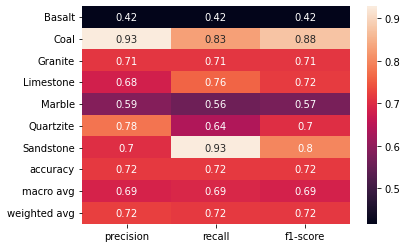

In [ ]:
# read config file
with open('config.json') as config_file:
    default = json.load(config_file)


# if __name__ == "__main__":

reset_random_seeds()
print(f"Default config:- {json.dumps(default, indent=2)}\n P.S - Not used in sweeps.\n\n")
run = wandb.init(project="Whats-this-rockv2",
                    entity="rock-classifiers",
                    config=default, allow_val_change=True)
config = wandb.config
IMAGE_SIZE = (config["image_size"], config["image_size"])

train_dataset, val_dataset, test_dataset = get_generators(config)
labels = ['Basalt', 'Coal', 'Granite', 'Limestone', 'Marble', 'Quartzite', 'Sandstone']
config['num_classes'] = len(labels)

model = train()
evaluate()

run.finish()

In [ ]:
train_dataset.class_indices

{'Basalt': 0,
 'Coal': 1,
 'Granite': 2,
 'Limestone': 3,
 'Marble': 4,
 'Quartzite': 5,
 'Sandstone': 6}

In [ ]:
evaluate()